# Northwind Data Mining and Statistical Analysis Project

##### By: Omolewa DAVIDS

In this Project, We will be working with the Northwind Database -- a free, open-source dataset created by Microsoft containing data from a fictional company <p>

#### Goal :
The goal of this project is to learn how to gather information from a real-world database and use the knowledge of statistical analysis and hypothesis testing to generate analytical insights that can be of value to the company. This goal will be achieved by querying the database to get the data needed to perform the statistical analysis

#### Business Drivers 
* Addition of new customers
* Addition/Removal of products
* Entry of new competitors

#### Business Objectives
* Manage the increase in volume
* Manage change within the budget
* Customer Retention

The main goal behind the construction of this data warehouse is to provide the users of this warehouse access to information that will provide answers to all their business queries. Majority of the queries would be based on the sales of the company in different geographic regions, by different customers, by different employees and at different times and within specific time periods. Some possible requirements are stated below in the form of queries. 
1.	What were the total sales in dollars and by unit quantity for all the years and in a particular year, quarter or month?
2.	What were the total sales in dollars and by unit quantity for all the categories of product, each category of product and every particular product in the given year?
3.	What were the total sales in dollars and by unit quantity for all the categories of product, each category of product and every particular product for all the years, quarters and months?
4.	What were the total sales in dollars for all the years, quarters and months by customer region?
5.	What were the total sales in dollars made by a particular employee in all the years, in a particular year, quarter or month?
6.	What was a particular suppliers share in the total sales in dollars in all the years, in a particular year, quarter or month?
7.	What was a particular shippers share in the total sales in dollars in all the years, in a particular year, quarter or month?

This study only addresses requirements 1 through 5 due to the need for limiting the scope.


Northwind Data Mining and Statistical Analysis Project

## Section 1: Connection to the Database
***

Load the ipython sql extension

In [1]:
%load_ext sql

Connect to the Database named **Northwind_small.sqlite**:

In [2]:
%sql sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite

'Connected: @/Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite'

## Section 2: Information about the Northwind Database
********

Get all the **SCHEMAS** from the database

In [3]:
import pandas as pd

In [4]:
df = %sql SELECT name, sql FROM sqlite_master WHERE type ='table' ORDER BY name;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


In [5]:
df = pd.DataFrame(df)

In [6]:
df.rename(columns={0:'Table Name', 1:'Description'}, inplace=True)

In [7]:
df

,Table Name,Description
0,Category,"CREATE TABLE ""Category"" \n(\n ""Id"" INTEGER PR..."
1,Customer,"CREATE TABLE ""Customer"" \n(\n ""Id"" VARCHAR(80..."
2,CustomerCustomerDemo,"CREATE TABLE ""CustomerCustomerDemo"" \n(\n ""Id..."
3,CustomerDemographic,"CREATE TABLE ""CustomerDemographic"" \n(\n ""Id""..."
4,Employee,"CREATE TABLE ""Employee"" \n(\n ""Id"" INTEGER PR..."
5,EmployeeTerritory,"CREATE TABLE ""EmployeeTerritory"" \n(\n ""Id"" V..."
6,Order,"CREATE TABLE ""Order"" \n(\n ""Id"" INTEGER PRIMA..."
7,OrderDetail,"CREATE TABLE ""OrderDetail"" \n(\n ""Id"" VARCHAR..."
8,Product,"CREATE TABLE ""Product"" \n(\n ""Id"" INTEGER PRI..."
9,Region,"CREATE TABLE ""Region"" \n(\n ""Id"" INTEGER PRIM..."


Retrieve **Table Name**, **Data Type** and the **Primary Key** column from each table

In [8]:
data_type_list = [] # Create a list for data type
primary_key_list = [] # Create a list for primary keys

# Perform slicing on the Description Column to retrive Data type of each primary keys
for i in range(len(df)):
    data_type_list.append(list(df['Description'])[i].split()[5])
    primary_key_list.append(list(df['Description'])[i].split()[4])
        

Create the Dataframe for the Schemas

In [9]:
Schemas = pd.DataFrame(list(zip(df['Table Name'], primary_key_list, data_type_list)), 
               columns =['Table Name', 'Primary_Key','Data_Type'])

In [10]:
Schemas

,Table Name,Primary_Key,Data_Type
0,Category,"""Id""",INTEGER
1,Customer,"""Id""",VARCHAR(8000)
2,CustomerCustomerDemo,"""Id""",VARCHAR(8000)
3,CustomerDemographic,"""Id""",VARCHAR(8000)
4,Employee,"""Id""",INTEGER
5,EmployeeTerritory,"""Id""",VARCHAR(8000)
6,Order,"""Id""",INTEGER
7,OrderDetail,"""Id""",VARCHAR(8000)
8,Product,"""Id""",INTEGER
9,Region,"""Id""",INTEGER


The Products table stores the details of each product. The Categories table stores the product category and description for each product and is linked to the Products table by the CategoryID. Each product is supplied by the supplier whose details are stored in the Suppliers table. The Products and Suppliers tables are linked by the SupplierID. Each order is taken by an employee and the employee details are stored in the Employees table. The different territories that the employees come from are stored in the Territories table, linked to the Employees table via the EmployeeTerritories table. The Territories are further divided into regions and these region details are stored in the Regions table. 

In [11]:
#%matplotlib inline
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from sklearn import datasets, linear_model

## Section 3: Effect of Discount on Quantity of Product in an Order
*****

The Information about **Quantity of Product** and **Discount** is contained in **OrderDetail** Table

In [12]:
%%sql
SELECT Product.ProductName, OrderDetail.Quantity, Product.UnitPrice, 
OrderDetail.Discount FROM OrderDetail LEFT OUTER JOIN Product ON
Product.Id = OrderDetail.ProductId;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


ProductName,Quantity,UnitPrice,Discount
Queso Cabrales,12,21,0.0
Singaporean Hokkien Fried Mee,10,14,0.0
Mozzarella di Giovanni,5,34.8,0.0
Tofu,9,23.25,0.0
Manjimup Dried Apples,40,53,0.0
Jack's New England Clam Chowder,10,9.65,0.0
Manjimup Dried Apples,35,53,0.15
Louisiana Fiery Hot Pepper Sauce,15,21.05,0.15
Gustaf's Knäckebröd,6,21,0.05
Ravioli Angelo,15,19.5,0.05


In [15]:
%sql SELECT * FROM Product;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25,120,0,25,0
7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30,15,0,10,0
8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40,6,0,0,0
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
10,Ikura,4,8,12 - 200 ml jars,31,31,0,0,0


In [16]:
%sql SELECT * FROM Category;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


Id,CategoryName,Description
1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings"
3,Confections,"Desserts, candies, and sweet breads"
4,Dairy Products,Cheeses
5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
6,Meat/Poultry,Prepared meats
7,Produce,Dried fruit and bean curd
8,Seafood,Seaweed and fish


In [17]:
%sql SELECT * FROM OrderDetail;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


Id,OrderId,ProductId,UnitPrice,Quantity,Discount
10248/11,10248,11,14,12,0.0
10248/42,10248,42,9.8,10,0.0
10248/72,10248,72,34.8,5,0.0
10249/14,10249,14,18.6,9,0.0
10249/51,10249,51,42.4,40,0.0
10250/41,10250,41,7.7,10,0.0
10250/51,10250,51,42.4,35,0.15
10250/65,10250,65,16.8,15,0.15
10251/22,10251,22,16.8,6,0.05
10251/57,10251,57,15.6,15,0.05


Create 2 Dataframes 
* ***Discount_df*** for Ordered Quantities when Discount was given
* ***No_Discount_df*** for Ordered Quantities when Discount was not given

In [18]:
# Call to database to retrieve the info
Discount_info = %sql SELECT Quantity, Discount FROM OrderDetail WHERE Discount != 0;
No_Discount_info = %sql SELECT Quantity, Discount FROM OrderDetail WHERE Discount == 0;

# Create the dataframe for each
Discount_df = pd.DataFrame(Discount_info, columns=['Quantity', 'Discount'])
No_Discount_df = pd.DataFrame(No_Discount_info, columns=['Quantity', 'Discount'])

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.
 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


In [19]:
# Check for missing Data
Discount_df.isna().sum()

Quantity    0
Discount    0
dtype: int64

In [20]:
No_Discount_df.isna().sum()

Quantity    0
Discount    0
dtype: int64

In [21]:
# Check the Shape
Discount_df.shape

(838, 2)

In [22]:
No_Discount_df.shape

(1317, 2)

In [23]:
print('Discounted Quantity Sold Mean: {}'.format(Discount_df['Quantity'].mean()))
print('Discounted Quantity Sold Standard Deviation: {}'.format(Discount_df['Quantity'].std()))
print('No Discounted Quantity Sold Mean: {}'.format(No_Discount_df['Quantity'].mean()))
print('No Discounted Quantity Sold Standard Deviation: {}'.format(No_Discount_df['Quantity'].std()))

Discounted Quantity Sold Mean: 27.10978520286396
Discounted Quantity Sold Standard Deviation: 20.771439234846042
No Discounted Quantity Sold Mean: 21.715261958997722
No Discounted Quantity Sold Standard Deviation: 17.507493472393012


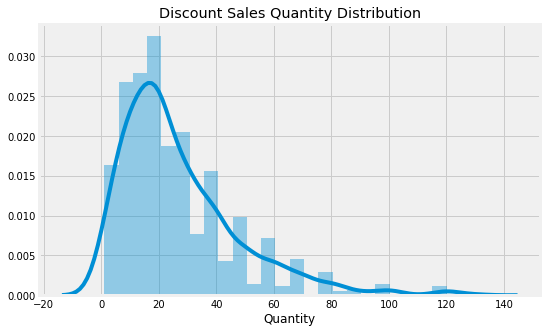

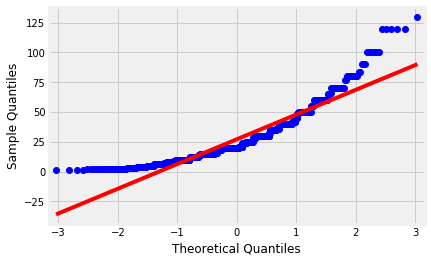

In [24]:
# Visualize data for normality
plt.figure(figsize=(8,5))
sns.distplot(Discount_df.Quantity)
plt.title('Discount Sales Quantity Distribution')
sm.qqplot(Discount_df.Quantity, line='s')
plt.show()

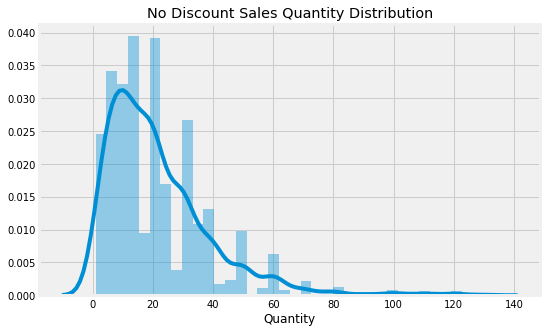

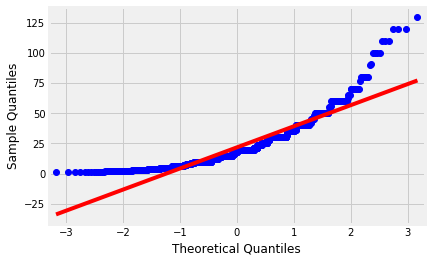

In [25]:
plt.figure(figsize=(8,5))
sns.distplot(No_Discount_df.Quantity)
plt.title('No Discount Sales Quantity Distribution')
sm.qqplot(No_Discount_df.Quantity, line='s')
plt.show()

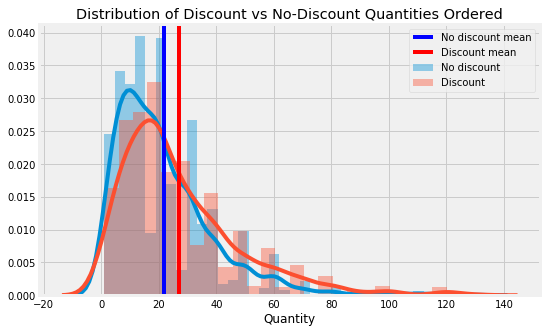

In [26]:
# Visualize Groups
plt.figure(figsize=(8,5))
sns.distplot(No_Discount_df['Quantity'], label='No discount')
sns.distplot(Discount_df['Quantity'], label='Discount')
plt.axvline(np.mean(No_Discount_df['Quantity']), color='blue', label='No discount mean')
plt.axvline(np.mean(Discount_df['Quantity']), color='red', label='Discount mean')
plt.title('Distribution of Discount vs No-Discount Quantities Ordered')
plt.legend()
plt.show()

In [27]:
Discount_mean = Discount_df['Quantity'].mean()
No_Discount_mean = No_Discount_df['Quantity'].mean()
Discount_std = Discount_df['Quantity'].std()
No_Discount_std = No_Discount_df['Quantity'].std()

In [28]:
# Compute the Degree of Freedom
def calc_degree_of_freedom(list1, list2):
    s1_squared = list1.var(ddof = 1)
    s2_squared = list2.var(ddof = 1)
    n1 = len(list1)
    n2 = len(list2)
    sn1 = s1_squared/n1
    sn2 = s1_squared/n2
    df_num = (sn1 + sn2)**2
    df_denom = (sn1)**2 / (n1-1) + (sn2)**2 / (n2-1)
    dof = df_num/df_denom
    return dof

In [29]:
calc_degree_of_freedom(Discount_df['Quantity'], No_Discount_df['Quantity'])

1782.1270274478945

In [30]:
print('Variance No discount:', np.var(No_Discount_df['Quantity']))
print('Variance Discount:', np.var(Discount_df['Quantity']))

Variance No discount: 306.2795924332751
Variance Discount: 430.93782787749


In [31]:
t_stat, p_val = stats.ttest_ind(No_Discount_df['Quantity'], Discount_df['Quantity'], equal_var=False)
print('P-Value:', p_val/2)

P-Value: 2.828207145152165e-10


### Accept or Reject
This p-value is divided by 2 because it is a one tail t-test. We get a p-value < 0.05 which means that we can reject our Null Hypothesis and accept the Alternative Hypothesis that there is a statistical significance between the samples. From our alpha, we can be 95% sure that there is a statistical significance that shows the average amount of items sold with a discount is greater than the average amount sold of items without a discount without this being due to random chance.

### Effect Size
We can use Cohen's $d$ in order to measure the effect size or represent the differentiation between our two sample groups.

In [32]:
def Cohen_d(group1, group2):

    # Compute Cohen's d.

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [33]:
d = Cohen_d(Discount_df['Quantity'], No_Discount_df['Quantity'])
print('d = {}'.format(d))

d = 0.2862724481729283


An effect of 0.28 is considered a small effect. Although it is small, it still means that there is a an effect happening but it is not so obvious to see without investigating like we have with our hypothesis testing.

### ANOVA Test
Since we have rejected the Null Hypothesis, we will run ANOVA test to see if there is any significance among the different discounts.

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [36]:
# Wrap Discount in C for categorical
formula  = 'Quantity ~ C(Discount)'
lm = ols(formula, data=order_details_df).fit()
table = sm.stats.anova_lm(lm, type=2)
print(table)

NameError: name 'order_details_df' is not defined

***Group the Table by Discount***

In [37]:
Discount_df['Discount'].unique()

array([0.15, 0.05, 0.2 , 0.25, 0.1 , 0.02, 0.03, 0.04, 0.06, 0.01])

In [38]:
percent = Discount_df.groupby('Discount')

In [39]:
# Create DataFrame for each Category
Discount_of_1_percent = percent.get_group(0.01)
Discount_of_2_percent = percent.get_group(0.02)
Discount_of_3_percent = percent.get_group(0.03)
Discount_of_4_percent = percent.get_group(0.04)
Discount_of_5_percent = percent.get_group(0.05)
Discount_of_6_percent = percent.get_group(0.06)
Discount_of_10_percent = percent.get_group(0.1)
Discount_of_15_percent = percent.get_group(0.15)
Discount_of_20_percent = percent.get_group(0.2)
Discount_of_25_percent = percent.get_group(0.25)

In [40]:
Discount_of_4_percent

,Quantity,Discount
832,1,0.04


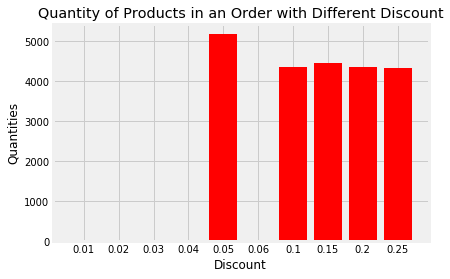

In [41]:
ax = plt.subplot()
condition_bar = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]
bar = [Discount_of_1_percent['Quantity'].sum(), Discount_of_2_percent['Quantity'].sum(), Discount_of_3_percent['Quantity'].sum(),
      Discount_of_4_percent['Quantity'].sum(), Discount_of_5_percent['Quantity'].sum(), Discount_of_6_percent['Quantity'].sum(),
      Discount_of_10_percent['Quantity'].sum(), Discount_of_15_percent['Quantity'].sum(), Discount_of_20_percent['Quantity'].sum(),
      Discount_of_25_percent['Quantity'].sum()]
plt.bar(range(len(condition_bar)), bar, color='red')
ax.set_xticks(range(0, len(condition_bar)))
ax.set_xticklabels(condition_bar)
plt.title('Quantity of Products in an Order with Different Discount')
plt.xlabel('Discount')
plt.ylabel('Quantities')
plt.show()

In [42]:
Discount_of_5_percent['Quantity'].sum()

5182

In [43]:
Discount_of_15_percent['Quantity'].sum()

4456

## Section 4: Effect of Double Digit Discount on Quantity of Product in an Order
***

In [48]:
%sql SELECT * FROM Customer;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,Western Europe,68306,Germany,0621-08460,0621-08924
BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,Western Europe,67000,France,88.60.15.31,88.60.15.32
BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,Southern Europe,28023,Spain,(91) 555 22 82,(91) 555 91 99
BONAP,Bon app,Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,Western Europe,13008,France,91.24.45.40,91.24.45.41
BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


In [49]:
# your code here 
def calc_degree_of_freedom(list1, list2):
    s1_squared = list1.var(ddof = 1)
    s2_squared = list2.var(ddof = 1)
    n1 = len(list1)
    n2 = len(list2)
    sn1 = s1_squared/n1
    sn2 = s1_squared/n2
    df_num = (sn1 + sn2)**2
    df_denom = (sn1)**2 / (n1-1) + (sn2)**2 / (n2-1)
    df = df_num/df_denom
    return df
print('Approximate degrees of freedom is {}'.format(df))

Approximate degrees of freedom is               Table Name                                        Description
0               Category  CREATE TABLE "Category" \n(\n  "Id" INTEGER PR...
1               Customer  CREATE TABLE "Customer" \n(\n  "Id" VARCHAR(80...
2   CustomerCustomerDemo  CREATE TABLE "CustomerCustomerDemo" \n(\n  "Id...
3    CustomerDemographic  CREATE TABLE "CustomerDemographic" \n(\n  "Id"...
4               Employee  CREATE TABLE "Employee" \n(\n  "Id" INTEGER PR...
5      EmployeeTerritory  CREATE TABLE "EmployeeTerritory" \n(\n  "Id" V...
6                  Order  CREATE TABLE "Order" \n(\n  "Id" INTEGER PRIMA...
7            OrderDetail  CREATE TABLE "OrderDetail" \n(\n  "Id" VARCHAR...
8                Product  CREATE TABLE "Product" \n(\n  "Id" INTEGER PRI...
9                 Region  CREATE TABLE "Region" \n(\n  "Id" INTEGER PRIM...
10               Shipper  CREATE TABLE "Shipper" \n(\n  "Id" INTEGER PRI...
11              Supplier  CREATE TABLE "Supplier" \n(\

## Section 5: Did Average Sales Decline in 2014 compared to 2013?
*******************************

## Section 6: Effect of Beverages on Revenue
****************************

In [50]:
%%sql
SELECT * FROM Product;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
1,Chai,1,1,10 boxes x 20 bags,18,39,0,10,0
2,Chang,1,1,24 - 12 oz bottles,19,17,40,25,0
3,Aniseed Syrup,1,2,12 - 550 ml bottles,10,13,70,25,0
4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22,53,0,0,0
5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25,120,0,25,0
7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30,15,0,10,0
8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40,6,0,0,0
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
10,Ikura,4,8,12 - 200 ml jars,31,31,0,0,0


In [51]:
%%sql 
SELECT * FROM Category;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


Id,CategoryName,Description
1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,Condiments,"Sweet and savory sauces, relishes, spreads, and seasonings"
3,Confections,"Desserts, candies, and sweet breads"
4,Dairy Products,Cheeses
5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
6,Meat/Poultry,Prepared meats
7,Produce,Dried fruit and bean curd
8,Seafood,Seaweed and fish


## Section 7: Does Average Revenue per Order vary between Customers from Different Regions
****************************

#### The Null and Alternative Hypothesis
$\mu_{a}$

Extract the data: Customer region, the total quantity of product ordered from each region, the Unit Price and the Discount level of each order

In [52]:
Employee_info = %sql SELECT od.OrderId, o.EmployeeId, e.LastName, e.FirstName, e.TitleOfCourtesy, e.Title, e.Country, SUM(od.Quantity * od.UnitPrice * (1-od.Discount)) Revenue FROM Employee e JOIN [Order] o ON e.Id = o.EmployeeId JOIN OrderDetail od ON o.Id = od.OrderId GROUP BY od.OrderId;

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


In [53]:
Employee_df = pd.DataFrame(Employee_info, columns=['OrderId', 'EmployeeId', 'LastName', 'FirstName', 'TitleOfCourtesy', 'Title', 'Country', 'Revenue'])

In [54]:
#Employee_df

In [55]:
Employee_df.shape

(830, 8)

In [56]:
Employee_df.isna().sum()

OrderId            0
EmployeeId         0
LastName           0
FirstName          0
TitleOfCourtesy    0
Title              0
Country            0
Revenue            0
dtype: int64

In [57]:
Employee_df.describe()

,OrderId,EmployeeId,Revenue
count,830.000000,830.000000,830.000000
mean,10662.500000,4.403614,1525.051855
std,239.744656,2.499648,1845.178595
min,10248.000000,1.000000,12.500000
25%,10455.250000,2.000000,456.688750
50%,10662.500000,4.000000,943.250000
75%,10869.750000,7.000000,1882.200000
max,11077.000000,9.000000,16387.500000


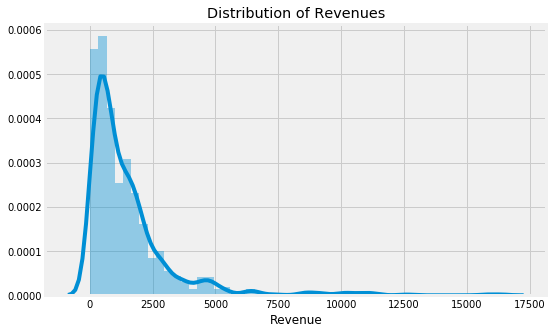

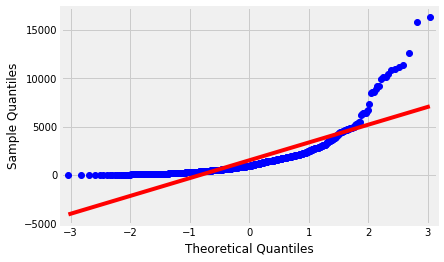

In [58]:
# Visualize data for normality
plt.figure(figsize=(8,5))
sns.distplot(Employee_df.Revenue)
plt.title('Distribution of Revenues')
sm.qqplot(Employee_df.Revenue, line='s')
plt.show()


In [59]:
# Group by USA and UK
groups = Employee_df.groupby('Country')
USA = groups.get_group('USA')
UK = groups.get_group('UK')


In [60]:
USA.shape

(606, 8)

In [61]:
UK.shape

(224, 8)

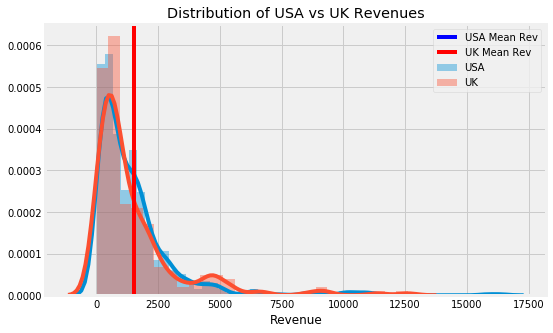

In [62]:
# Visualize Groups
plt.figure(figsize=(8,5))
sns.distplot(USA['Revenue'], label='USA')
sns.distplot(UK['Revenue'], label='UK')
plt.axvline(np.mean(USA['Revenue']), color='blue', label='USA Mean Rev')
plt.axvline(np.mean(UK['Revenue']), color='red', label='UK Mean Rev')
plt.title('Distribution of USA vs UK Revenues')
plt.legend()
plt.show()

In [63]:
print(USA.describe())

            OrderId  EmployeeId       Revenue
count    606.000000  606.000000    606.000000
mean   10661.547855    3.551155   1520.150703
std      241.069141    2.285388   1829.031323
min    10250.000000    1.000000     18.400000
25%    10449.250000    2.000000    456.750000
50%    10661.000000    3.000000   1013.872500
75%    10871.000000    4.000000   1847.660000
max    11077.000000    8.000000  16387.500000


In [64]:
print(UK.describe())

            OrderId  EmployeeId       Revenue
count    224.000000  224.000000    224.000000
mean   10665.075893    6.709821   1538.311221
std      236.639797    1.319292   1892.265365
min    10248.000000    5.000000     12.500000
25%    10482.250000    6.000000    454.066250
50%    10666.500000    7.000000    868.650000
75%    10869.250000    7.000000   1896.087500
max    11074.000000    9.000000  12615.050000


Although there are almost three times more orders, and therefore a higher total revenue in the USA, the UK has a higher mean revenue.

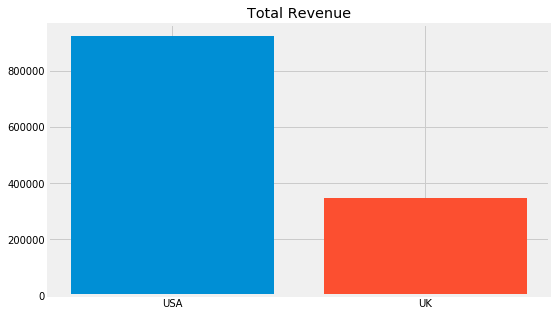

In [65]:
plt.figure(figsize=(8,5))
plt.bar('USA', USA['Revenue'].sum())
plt.bar('UK', UK['Revenue'].sum())
plt.title('Total Revenue')
plt.show()

#### Hypothesis
Null Hypothesis: The average revenue from the USA is equal to the average revenue from the UK.

$H_0: \mu_a = \mu_b$

Alternative Hypothesis: The average revenue from the UK is not equal to the average revenue from the USA.

$H_a: \mu_a \neq \mu_b$

Will use an $\alpha$ = 0.05

Two Sample T-Test (two tail)
For this hypothesis test, since we are comparing two sample means from continuous data against each other to test for significance, we will use a two sample t-test.

In [66]:
# Check to see if variance is the same between the samples
print(np.var(USA['Revenue']))
print(np.var(UK['Revenue']))

3339835.18997902
3564683.085015846


In [67]:
# Use Welche's t-test since variance is different
t_stat, p_val = stats.ttest_ind(USA['Revenue'], UK['Revenue'], equal_var=False)
print(p_val)

0.9015080381474145


Since the data for Revenue is highly skewed to the right, I will also use a resampling method in order to make sample distributions that approximate a normal distribution of the mean differences between the revenue for USA and UK. If less than 5% of the difference between random samples are greater than the original_diff, then this would mean that the original difference is significant and not due to random chance and thus there would be reason to reject the null hypothesis. Let's see if the p-value will match our p-value from the t-test.

In [68]:
# Generate 10000 random samples of mean differences
diffs = []
for i in range(10000):
    sample_1 = Employee_df['Revenue'].sample(415)
    sample_2 = Employee_df.drop(sample_1.index)['Revenue']
    diff = np.mean(sample_1) - np.mean(sample_2)
    diffs.append(diff)

# Count number of differences greater than our original difference    
count = 0
for diff in diffs:
    if diff >= original_diff:
        count += 1
        
# Get p-value 
p_val = count / 10000
p_val*2

NameError: name 'original_diff' is not defined

## Section 8: Does Shipment Time Difference and Freight Price Difference between Companies  statistically significant?

In [69]:
shipment_info = %sql SELECT * FROM [Order] o JOIN Shipper s ON s.Id = o.ShipVia

 * sqlite:////Users/adara/module3/dsc-mod-3-project-atlanta-ds-091619/Northwind_small.sqlite
Done.


In [70]:
shipment_df = pd.DataFrame(shipment_info, columns=['Id', 'CustomerId', 'EmployeeId', 'OrderDate',
                                                   'RequiredDate', 'ShippedDate', 'ShipVia', 'Freight',
                                                   'ShipName', 'ShipAddress', 'ShipCity', 'ShipRegion',
                                                   'ShipPostalCode', 'ShipCountry', 'Id_1', 'CompanyName',
                                                   'Phone'])
freight_df = pd.DataFrame(shipment_info, columns=['Id', 'CustomerId', 'EmployeeId', 'OrderDate',
                                                   'RequiredDate', 'ShippedDate', 'ShipVia', 'Freight',
                                                   'ShipName', 'ShipAddress', 'ShipCity', 'ShipRegion',
                                                   'ShipPostalCode', 'ShipCountry', 'Id_1', 'CompanyName',
                                                   'Phone'])

In [71]:
shipment_df.head()

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,Id_1,CompanyName,Phone
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France,3,Federal Shipping,(503) 555-9931
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany,1,Speedy Express,(503) 555-9831
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil,2,United Package,(503) 555-3199
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France,1,Speedy Express,(503) 555-9831
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium,2,United Package,(503) 555-3199


In [72]:
shipment_df.describe()

,Id,EmployeeId,ShipVia,Freight,Id_1
count,830.000000,830.000000,830.000000,830.000000,830.000000
mean,10662.500000,4.403614,2.007229,78.244205,2.007229
std,239.744656,2.499648,0.779685,116.779294,0.779685
min,10248.000000,1.000000,1.000000,0.020000,1.000000
25%,10455.250000,2.000000,1.000000,13.380000,1.000000
50%,10662.500000,4.000000,2.000000,41.360000,2.000000
75%,10869.750000,7.000000,3.000000,91.430000,3.000000
max,11077.000000,9.000000,3.000000,1007.640000,3.000000


**Calculate the Shipment Time Difference**

In [73]:
# Change all the date to date time and find the shipment time
shipment_df['ShippedDate'] = pd.to_datetime(shipment_df['ShippedDate'])
shipment_df['OrderDate'] = pd.to_datetime(shipment_df['OrderDate'])
shipment_df['ShippingTime'] = shipment_df['ShippedDate'] - shipment_df['OrderDate']

# Create a New Dataframe that containg the attributes that we need for Testing the Hypothesis
shipment_df = shipment_df[['CompanyName', 'OrderDate', 'ShippedDate', 'ShippingTime']]
shipment_df['ShippingTime'] = shipment_df['ShippingTime'].dt.days # To remove the units(Days)
shipment_df.head()

,CompanyName,OrderDate,ShippedDate,ShippingTime
0,Federal Shipping,2012-07-04,2012-07-16,12.0
1,Speedy Express,2012-07-05,2012-07-10,5.0
2,United Package,2012-07-08,2012-07-12,4.0
3,Speedy Express,2012-07-08,2012-07-15,7.0
4,United Package,2012-07-09,2012-07-11,2.0


In [74]:
shipment_df.isna().sum() # Check for missing data

CompanyName      0
OrderDate        0
ShippedDate     21
ShippingTime    21
dtype: int64

In [75]:
len(shipment_df)

830

In [76]:
# Drop all rows with missing data
shipment_df = shipment_df.dropna()

In [77]:
shipment_df.isna().sum()

CompanyName     0
OrderDate       0
ShippedDate     0
ShippingTime    0
dtype: int64

In [78]:
len(shipment_df)

809

In [79]:
shipment_df.head()

,CompanyName,OrderDate,ShippedDate,ShippingTime
0,Federal Shipping,2012-07-04,2012-07-16,12.0
1,Speedy Express,2012-07-05,2012-07-10,5.0
2,United Package,2012-07-08,2012-07-12,4.0
3,Speedy Express,2012-07-08,2012-07-15,7.0
4,United Package,2012-07-09,2012-07-11,2.0


In [80]:
shipment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 0 to 821
Data columns (total 4 columns):
CompanyName     809 non-null object
OrderDate       809 non-null datetime64[ns]
ShippedDate     809 non-null datetime64[ns]
ShippingTime    809 non-null float64
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 31.6+ KB


In [81]:
shipment_df.ShippingTime.unique()

array([12.,  5.,  4.,  7.,  2.,  6.,  3., 10., 11.,  8., 30., 18.,  9.,
        1., 29., 13., 26., 34., 15., 19., 22., 32., 24., 21., 35., 16.,
       23., 20., 17., 27., 25., 14., 31., 37., 28.])

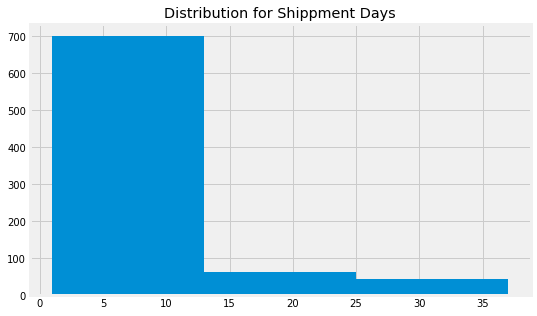

In [82]:
plt.figure(figsize=(8,5))
plt.hist(shipment_df.ShippingTime, bins=3)
plt.title('Distribution for Shippment Days')
plt.show()

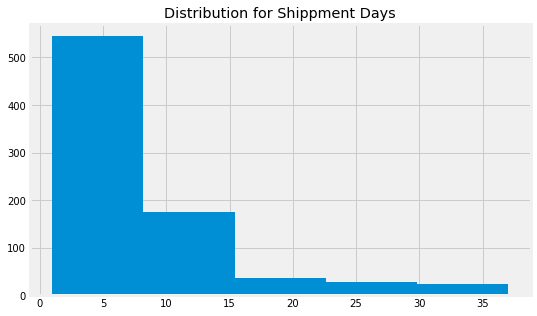

In [83]:
plt.figure(figsize=(8,5))
plt.hist(shipment_df.ShippingTime, bins=5)
plt.title('Distribution for Shippment Days')
plt.show()

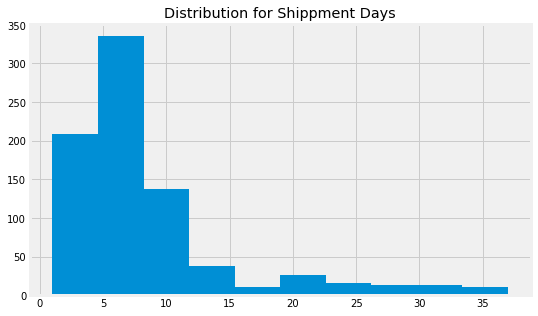

In [84]:
plt.figure(figsize=(8,5))
plt.hist(shipment_df.ShippingTime, bins=10)
plt.title('Distribution for Shippment Days')
plt.show()

These distributions shows that most of the shipment were made between 5 - 7 days. I will group them to 5 groups and see if improvement on the shipment date will have improve the business
* Group A : 2 - 8 days
* Group B : 8 - 15 days
* Group C : 15 - 23 days
* Group D : 23 - 30 days
* Group E : 30 - 37 days

### Hypothesis
Null Hypothesis: The average shipping time for all three shipping companies are equal

$H_0: \mu_a = \mu_b = \mu_c = \mu_d = \mu_e$

Alternative Hypothesis: At least one of the average shippint time is different

$H_a: \mu_a \neq \mu_b \neq \mu_c \neq \mu_d \neq \mu_e$

we will be testing the Hypothesis at $\alpha$ = 0.05 

In [85]:
# ANOVA test
formula = 'ShippingTime ~ C(CompanyName)'
lm = ols(formula, shipment_df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                      sum_sq     df         F    PR(>F)
C(CompanyName)    433.501581    2.0  4.676819  0.009563
Residual        37354.696194  806.0       NaN       NaN


In [86]:
g1 = [1, 2, 3, 4, 5, 6, 7, 8]
g2 = [9, 10, 11, 12, 13, 14, 15]
g3 = [16, 17, 18, 19, 20, 21, 22, 23]
g4 = [24, 25, 26, 27, 28, 29, 30]
g5 = [31, 32, 33, 34, 35, 36, 37]


In [87]:
group_1 = []
group_2 = []
group_3 = []
group_4 = []
group_5 = []
i = 0
while i < len(shipment_df):
    if list(shipment_df['ShippingTime'])[i] in g1:
        group_1.append(list(shipment_df['ShippingTime'])[i])
    elif list(shipment_df['ShippingTime'])[i] in g2:
        group_2.append(list(shipment_df['ShippingTime'])[i])
    elif list(shipment_df['ShippingTime'])[i] in g3:
        group_3.append(list(shipment_df['ShippingTime'])[i])
    elif list(shipment_df['ShippingTime'])[i] in g4:
        group_4.append(list(shipment_df['ShippingTime'])[i])
    else:
        group_5.append(list(shipment_df['ShippingTime'])[i])
    i = i + 1

In [88]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [89]:
fvalue, pvalue = stats.f_oneway(group_1, group_2, group_3, group_4, group_5)

In [90]:
print(fvalue, pvalue)

2251.6349791535467 0.0


**Interpretation**: The P-value obtained from ANOVA analysis is significant (P<0.05), and therefore, we conclude that there are significant differences among the groups.

From ANOVA analysis, we know that shippment date differences are statistically significant, but ANOVA does not tell which treatments are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (Post-hoc comparison) analysis using Tukey HSD test.

In [91]:
# Put into dataframe
group1_df = pd.DataFrame()
group2_df = pd.DataFrame()
group3_df = pd.DataFrame()
group4_df = pd.DataFrame()
group5_df = pd.DataFrame()
group1_df['group_1'] = group_1
group2_df['group_2'] = group_2
group3_df['group_3'] = group_3
group4_df['group_4'] = group_4
group5_df['group_5'] = group_5

In [92]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
m_comp = pairwise_tukeyhsd(groups=group1_df['group_1'], group2_df['group_2'], group3_df['group_3'], alpha=0.05)
print(m_comp_res)
# Set up the data for comparison (creates a specialised object)
#MultiComp = MultiComparison(group1_df['group_1'], group2_df['group_2'], group3_df['group_3'])

# Show all pair-wise comparisons:

# Print the comparisons

#print(MultiComp.tukeyhsd().summary())


SyntaxError: positional argument follows keyword argument (<ipython-input-92-d1d3dc9e437f>, line 3)

import numpy as np
from scipy import stats
 
data = np.rec.array(

group_1 = {}
for num in group1_df['group_1']:
    group_1['group1'] = num

In [108]:
list(group1_df['group_1']).score


AttributeError: 'list' object has no attribute 'score'

In [102]:
group_1

{'group1': 2.0}

In [ ]:
freight_df 

In [ ]:
freight_df = freight_df[['Freight', 'CompanyName']] # Select the Freight and CompanyName columns

In [ ]:
freight_df.Freight.groupby(freight_df.CompanyName).describe()[['count', 'mean']] # Calculate the mean and count to plot

In [ ]:
# Plot the Bar Chart for the Shipping Companies
plt.figure(figsize=(8,5))
plt.title('Average Freight the Shipping Companies')

company_list = freight_df['CompanyName'].unique()

for name in company_list:
    plt.bar(name, freight_df[freight_df['CompanyName']==name]['Freight'].mean())

In [ ]:
speedy_express = freight_df[freight_df['CompanyName']=='Speedy Express']
print('Pop Mean:', np.mean(freight_df.Freight))
print('SE Mean:', np.mean(speedy_express.Freight))
print('Mean Diff:', np.mean(speedy_express.Freight) - np.mean(freight_df.Freight))

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(freight_df.Freight, label='Pop distribution')
plt.axvline(np.mean(freight_df.Freight), color='blue', label='Mean pop freight')
plt.axvline(np.mean(freight_df[freight_df['CompanyName']=='Speedy Express']['Freight']), color='red', label='Mean SE freight')
plt.title('Freight Price Distribution')
plt.legend()
plt.show()

### Hypothesis
Null Hypothesis: The average freight price for Speedy Express is equal to the average freight price for other shipping companies

$H_0: \mu_a = \mu_b $

Alternative Hypothesis: The average freight price of Speedy Express is less than the other Shipping Companies

$H_a: \mu_a < \mu_b$

we will be testing the Hypothesis at $\alpha$ = 0.025 and a one-tailed test

In [ ]:
t_stat, p_val = stats.ttest_1samp(freight_df[freight_df['CompanyName']=='Speedy Express']['Freight'], np.mean(freight_df.Freight))
print('P-value:', p_val/2)

**Interpretation**: The P-value obtained is significant (P<0.05), and therefore, we reject the null hypothesis. We conclude that the average freight price for Speedy Express is less than the average price of all shipping companies.

In [115]:
frames = [group1_df['group_1'], group2_df['group_2']]

In [116]:
result = pd.concat(frames)

In [118]:
#result